In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from qiskit.tools import visualization
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit import IBMQ
IBMQ.save_account('127713ca720abc93ebfc7b1056cea850aff5fa82b4617fa75de01472448cab3697df1f854ce503db01a689f41212d24d3d573e1df911bec0ed90a761e74702c0')

c:\users\hrush\.conda\envs\quantum_computing\lib\site-packages\qiskit\providers\ibmq\credentials\configrc.py:130: UserWarning: Credentials already present. Set overwrite=True to overwrite.
  warnings.warn('Credentials already present. '


In [2]:
sub_circ = QuantumCircuit(3, name = "sub_circ1")
sub_circ.h(0)
sub_circ.cx(0, 1)
sub_circ.cx(1, 2)

sub_inst = sub_circ.to_instruction()


In [4]:
from qiskit.circuit import Gate
error = Gate(name='Error', num_qubits=9, params=[])

In [10]:
sub_circ2 = QuantumCircuit(3, name = "sub_circ2")
sub_circ2.cx(1, 0)
sub_circ2.cx(1, 0)
sub_circ2.ccx(0, 2, 1)
sub_circ2.h(0)
c2 = sub_circ2.to_instruction()

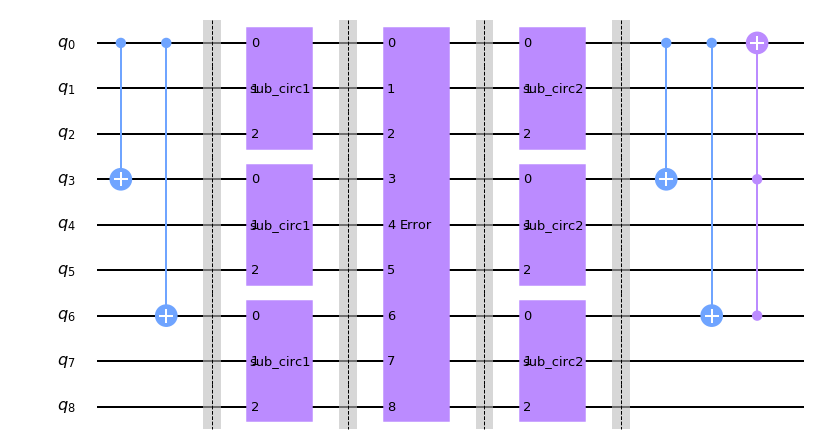

In [11]:
qc = QuantumCircuit(9)
qc.cx(0,3)
qc.cx(0,6)
qc.barrier()

for i in range (0, 7, 3):
    qc.append(sub_inst, [i, i+1, i+2])
qc.barrier()
qc.append(error, [0, 1, 2, 3, 4, 5, 6, 7, 8])
qc.barrier()
for i in range (0, 7, 3):
    qc.append(c2, [i, i+1, i+2])
qc.barrier()
qc.cx(0, 3)
qc.cx(0, 6)
qc.ccx(6, 3, 0)
qc.draw(output = "mpl")

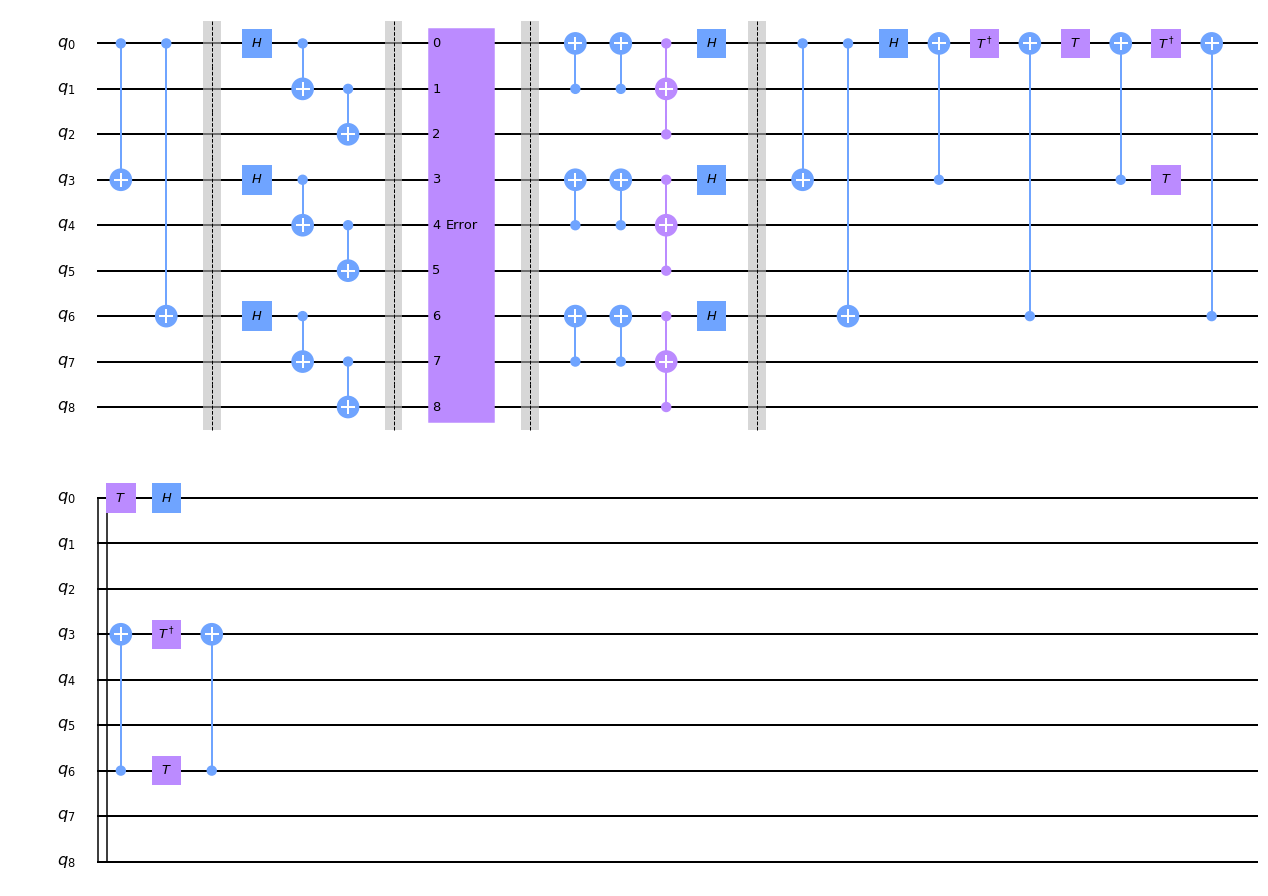

In [12]:
qc.decompose().draw(output="mpl")